<a href="https://colab.research.google.com/github/8066-asad/Evaluating-of-Best-Machine-learning-technique-for-Analysis-of-Raft-Foundations/blob/main/Comparsion_for_ML_Model_for_Analysis_of_Raft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Expanded Analysis of Rafts (1).xlsx to Expanded Analysis of Rafts (1) (2).xlsx
=== Data Overview ===
Dataset shape: (500, 12)
Missing values:
Number of  Columns                            0
Area Of Raft (m^2)                            0
Column Area (m^2)                             0
Compressive strength of Concrete Fc' (Mpa)    0
Concrete Unit Weight (kN/m^3)                 0
Subgrade Modulus kN/m/m^2                     0
Maximum Axial Load on Column in kN            0
Total Axial load on Column (kN)               0
Thickness of Raft (mm)                        0
Settlement (mm)                               0
Punching Shear Value                          0
Bearing Pressure (kPa)                        0
dtype: int64

Data types:
Number of  Columns                              int64
Area Of Raft (m^2)                              int64
Column Area (m^2)                             float64
Compressive strength of Concrete Fc' (Mpa)    float64
Concrete Unit Weight (kN/m^3)    

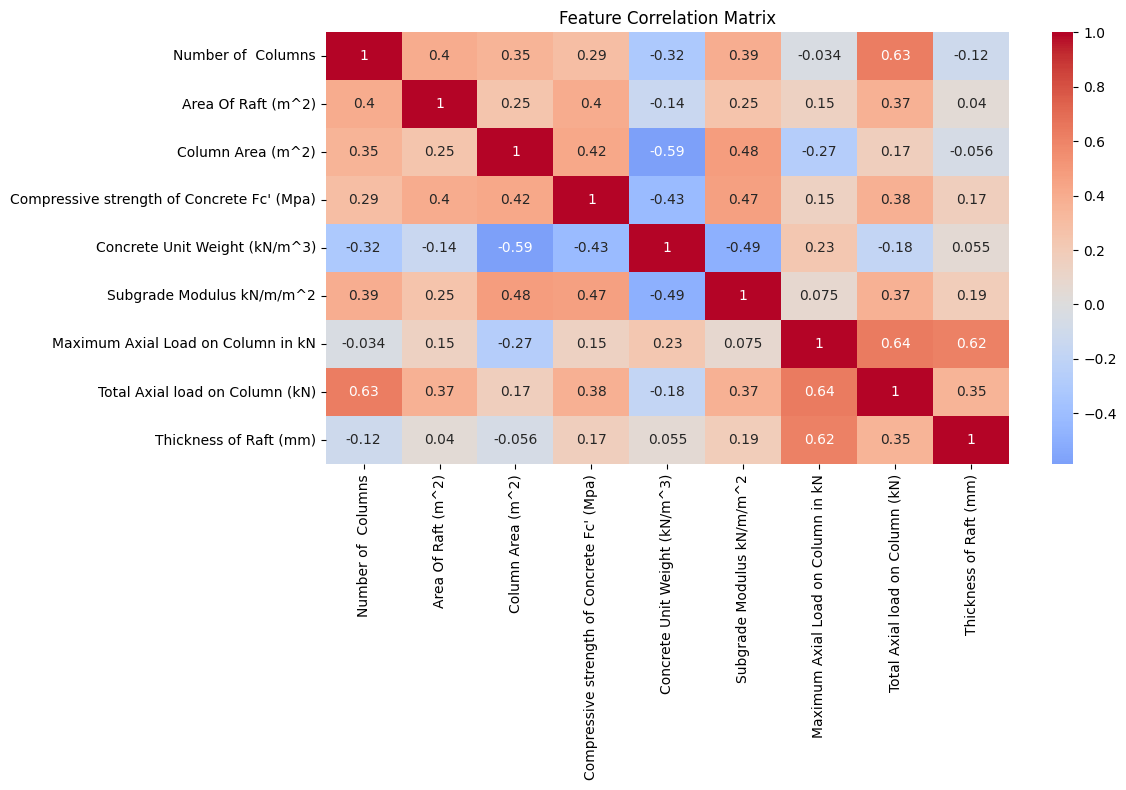


Features after engineering: 13
Selected features: ['Number of  Columns', 'Area Of Raft (m^2)', 'Column Area (m^2)', "Compressive strength of Concrete Fc' (Mpa)", 'Concrete Unit Weight (kN/m^3)', 'Subgrade Modulus kN/m/m^2', 'Maximum Axial Load on Column in kN', 'Load_per_Column', 'Raft_Load_Ratio', 'Strength_to_Load_Ratio']

EVALUATING WITH StandardScaler

--- Linear Regression ---

Settlement (mm):
  R² Score (Test): 0.6088
  R² Score (Train): 0.5774
  CV R² Score: 0.4970
  RMSE: 3.4926
  MAE: 2.4409

Punching Shear Value:
  R² Score (Test): 0.7944
  R² Score (Train): 0.7868
  CV R² Score: 0.7655
  RMSE: 0.0835
  MAE: 0.0629

Bearing Pressure (kPa):
  R² Score (Test): 0.7936
  R² Score (Train): 0.7731
  CV R² Score: 0.7568
  RMSE: 23.7925
  MAE: 17.2237

--- Ridge Regression ---

Settlement (mm):
  R² Score (Test): 0.6081
  R² Score (Train): 0.5774
  CV R² Score: 0.4977
  RMSE: 3.4955
  MAE: 2.4365

Punching Shear Value:
  R² Score (Test): 0.7947
  R² Score (Train): 0.7868
  CV R² Sc

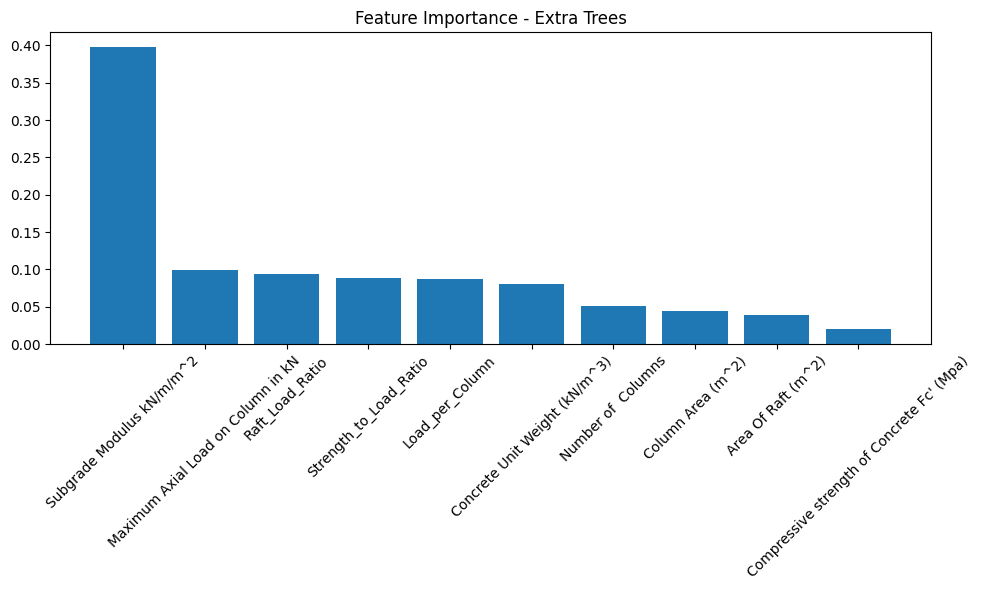


Feature Importance Rankings:
1. Subgrade Modulus kN/m/m^2: 0.3976
2. Maximum Axial Load on Column in kN: 0.0995
3. Raft_Load_Ratio: 0.0938
4. Strength_to_Load_Ratio: 0.0880
5. Load_per_Column: 0.0872
6. Concrete Unit Weight (kN/m^3): 0.0799
7. Number of  Columns: 0.0503
8. Column Area (m^2): 0.0438
9. Area Of Raft (m^2): 0.0391
10. Compressive strength of Concrete Fc' (Mpa): 0.0207


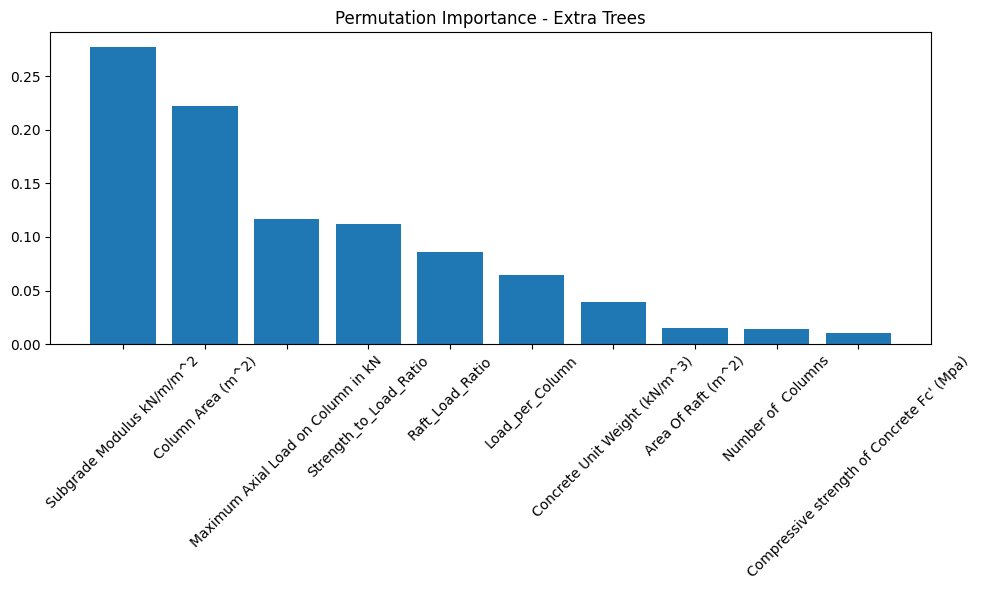

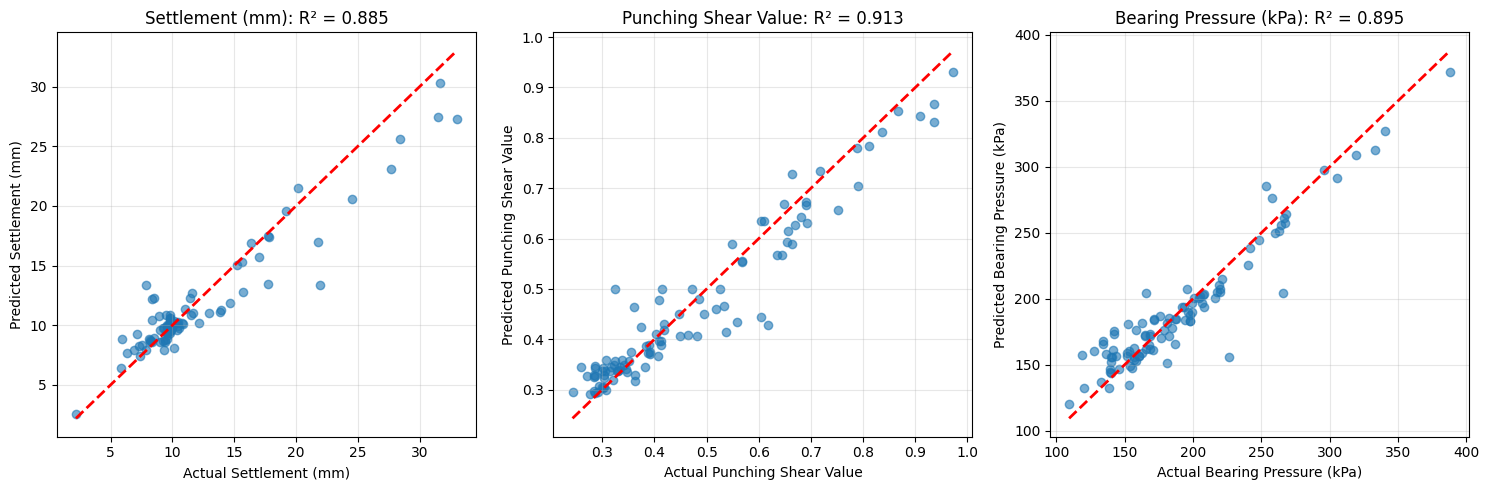


MODEL COMPARISON SUMMARY
        Scaler                     Model   Avg_R²  Settlement_R²_Test  Settlement_R²_Train  Punching_R²_Test  Punching_R²_Train  Bearing_R²_Test  Bearing_R²_Train
  MinMaxScaler               Extra Trees 0.897668            0.884852             0.986842          0.913362           0.994203         0.894789          0.989898
StandardScaler               Extra Trees 0.897668            0.884852             0.986842          0.913362           0.994203         0.894789          0.989898
  RobustScaler               Extra Trees 0.897668            0.884852             0.986842          0.913362           0.994203         0.894789          0.989898
StandardScaler                  CatBoost 0.889367            0.867459             0.939727          0.899395           0.973853         0.901246          0.963409
  RobustScaler                  CatBoost 0.889358            0.867431             0.939727          0.899395           0.973853         0.901246          0.963

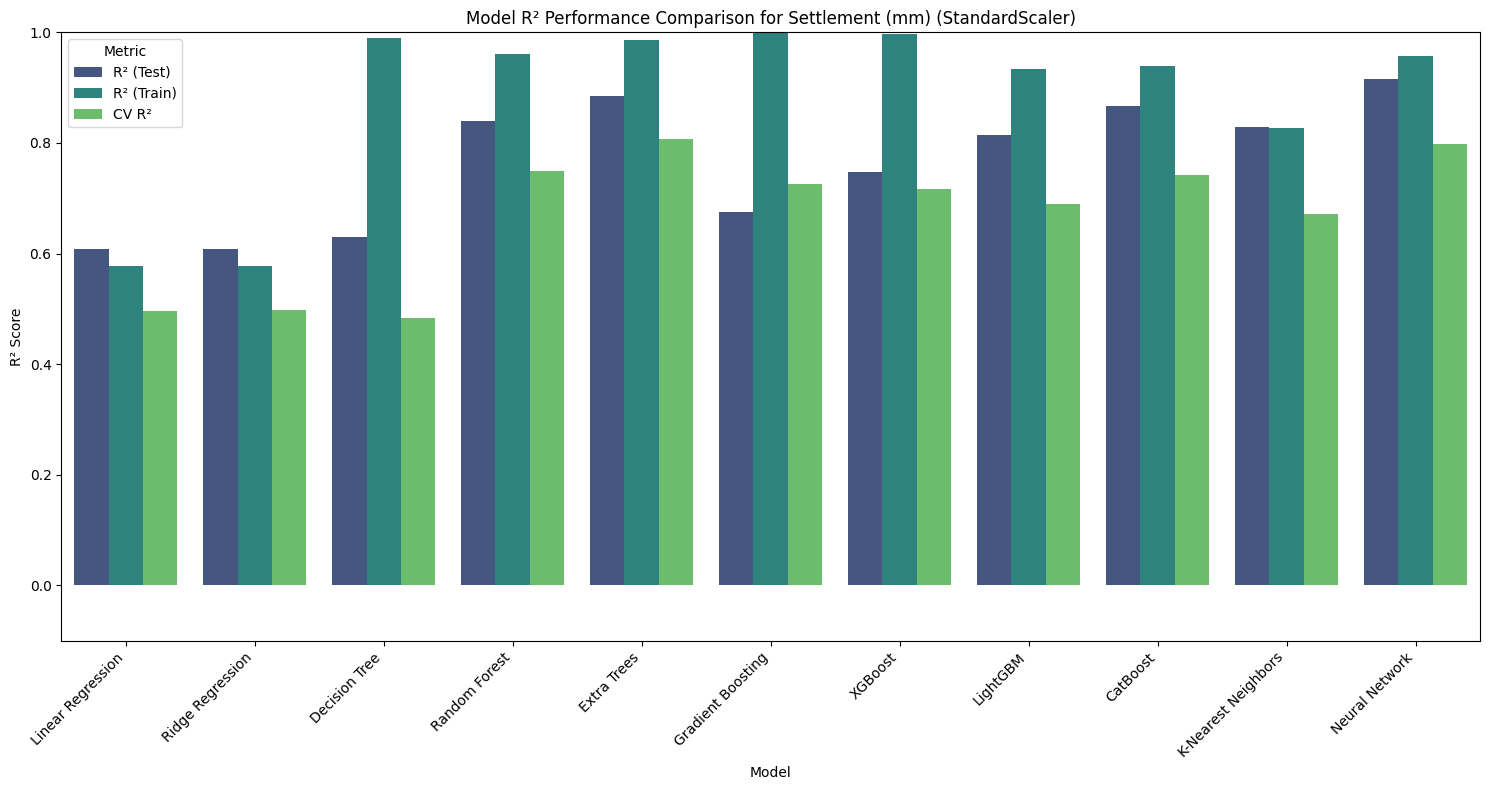

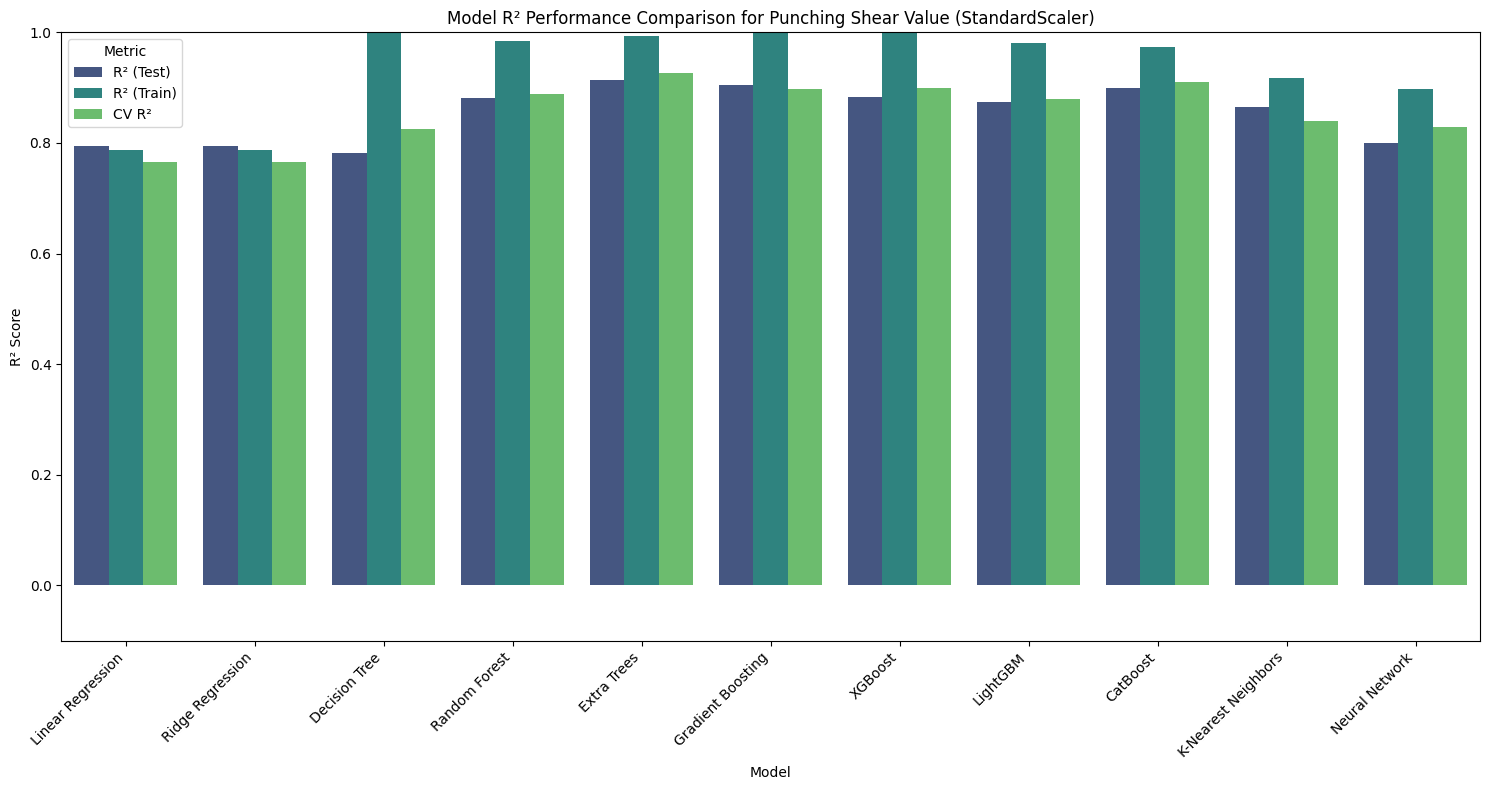

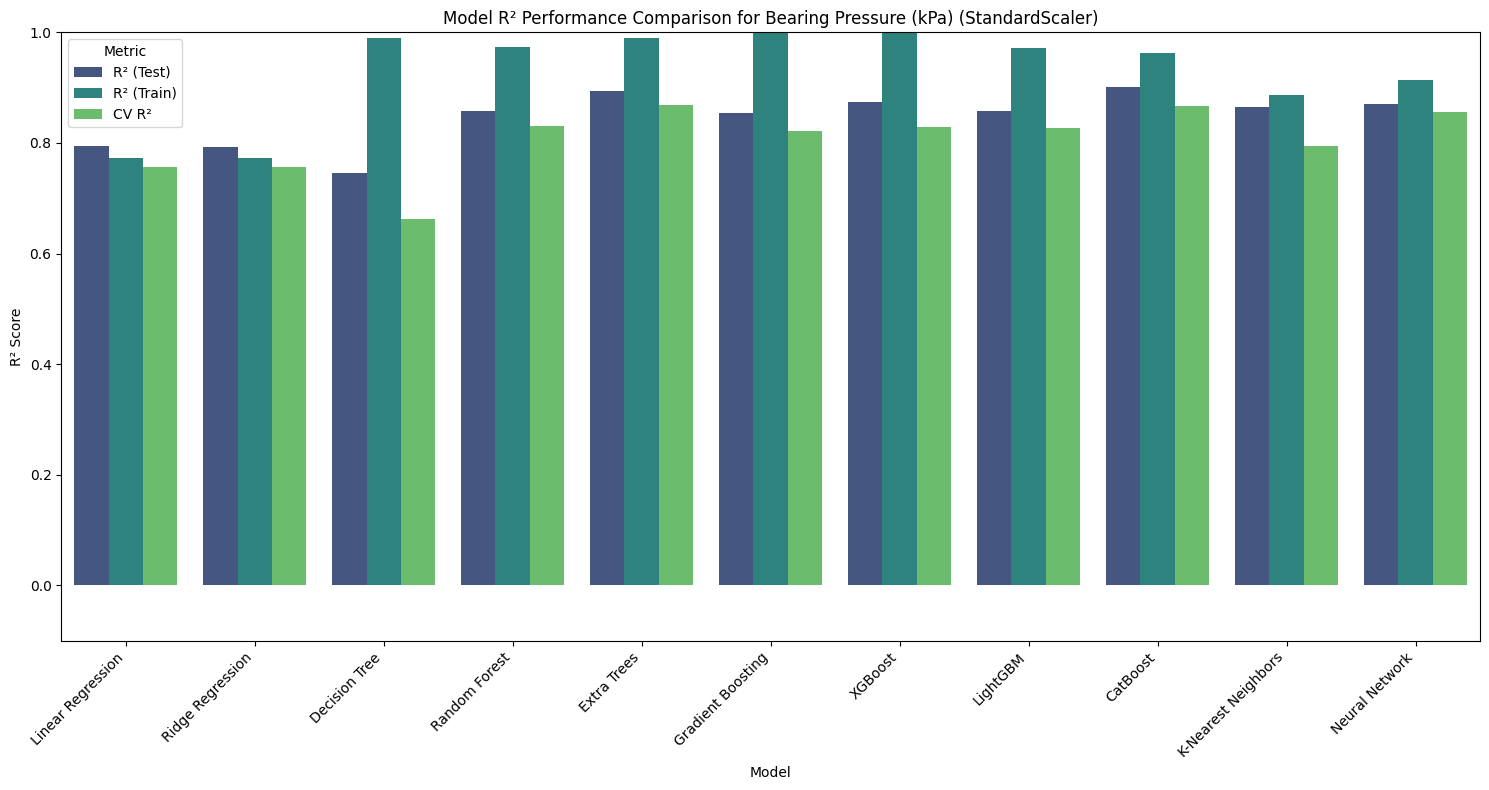

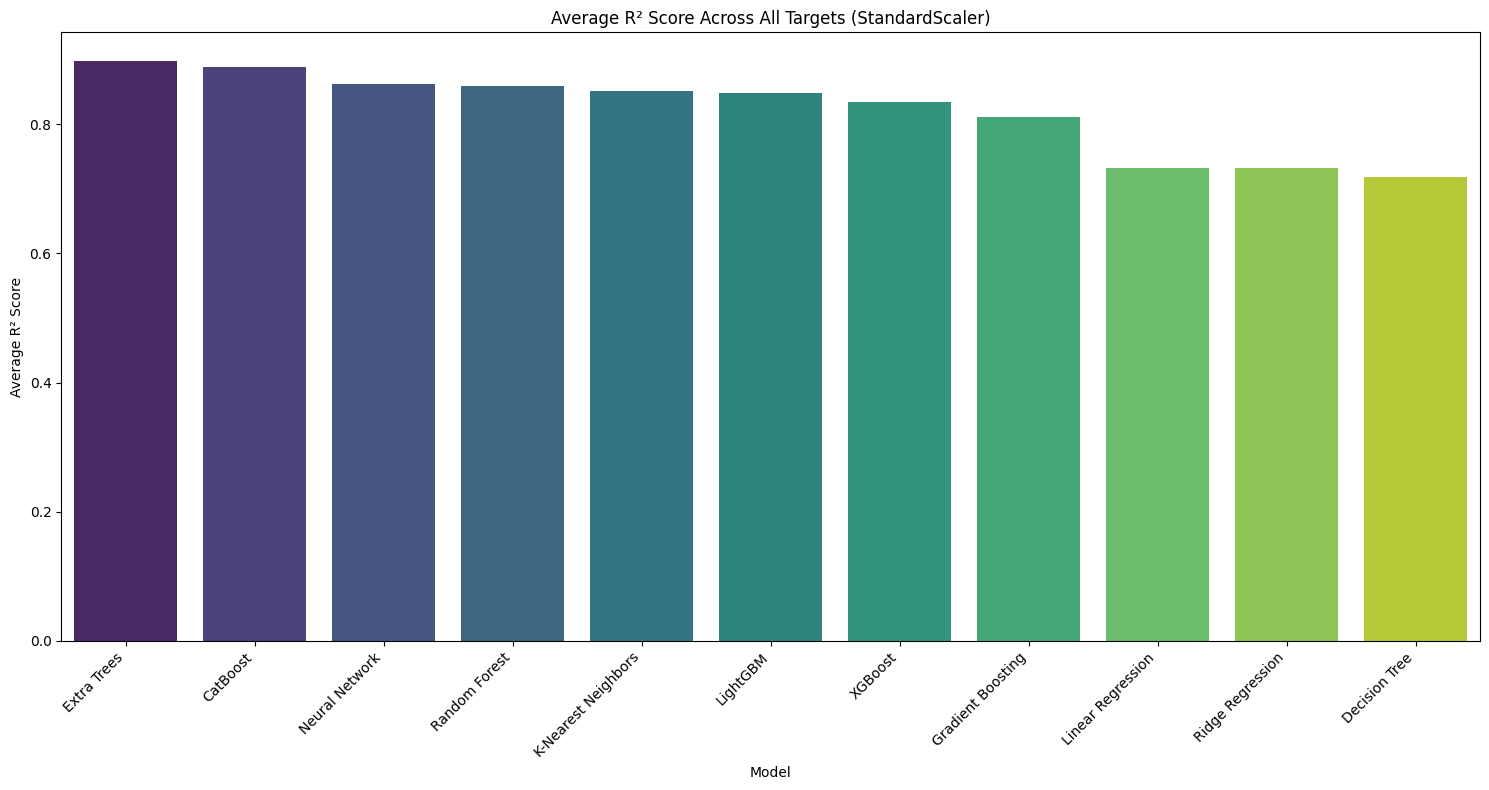


PREDICTION ANALYSIS VISUALIZATIONS (StandardScaler)

--- Prediction Analysis for Extra Trees (StandardScaler) ---


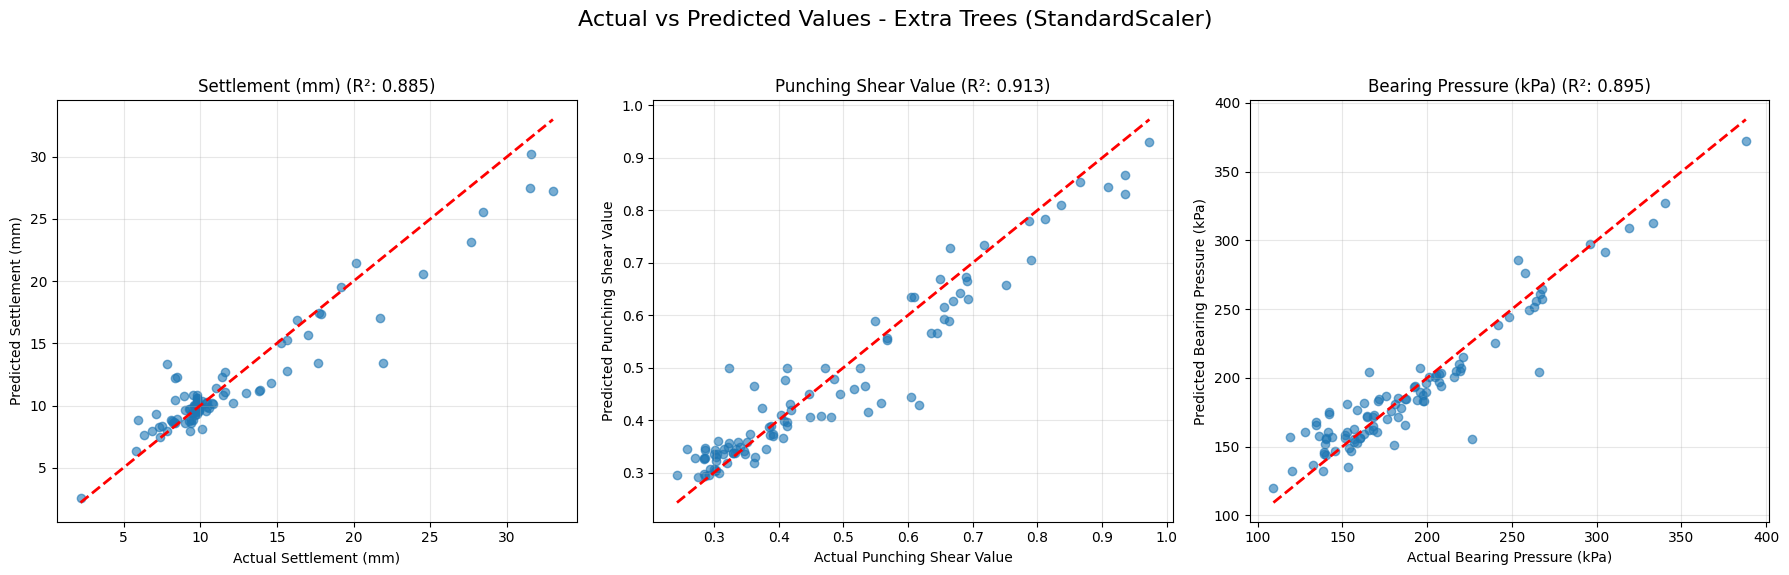

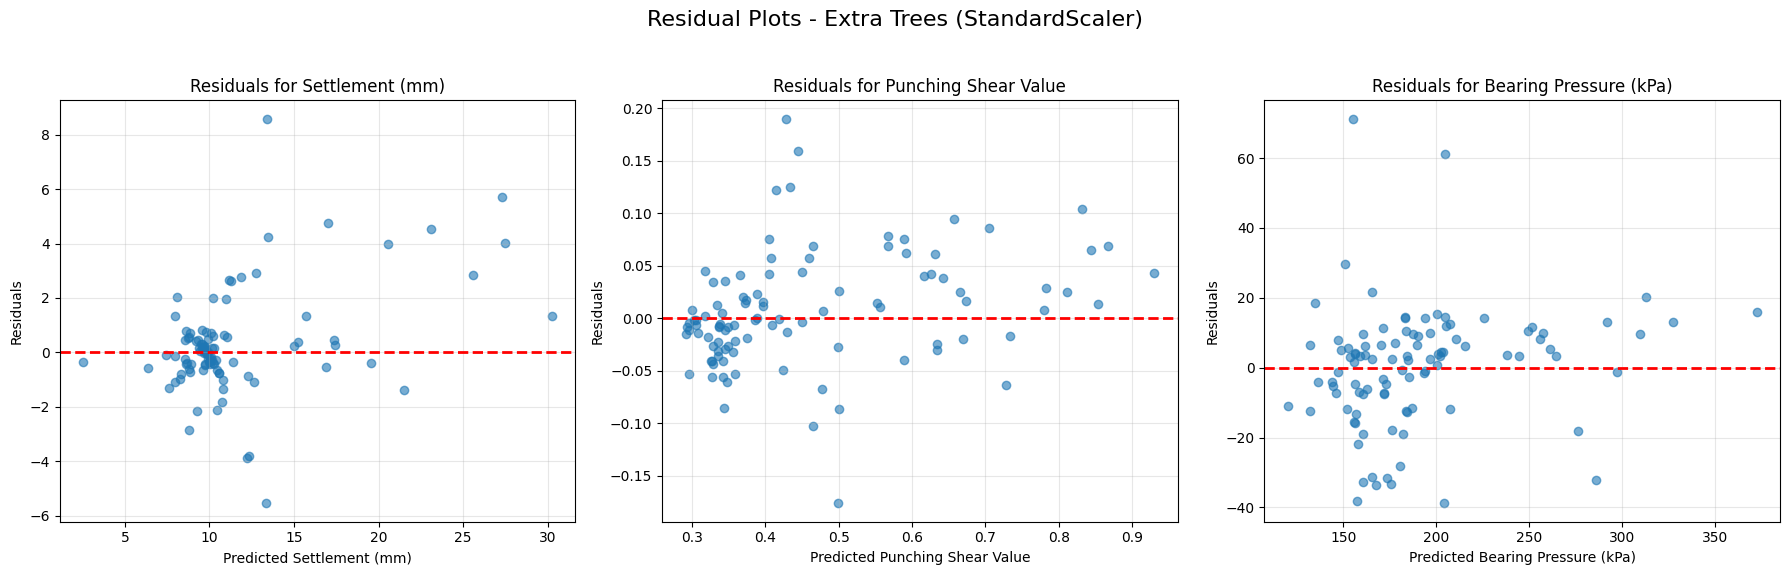

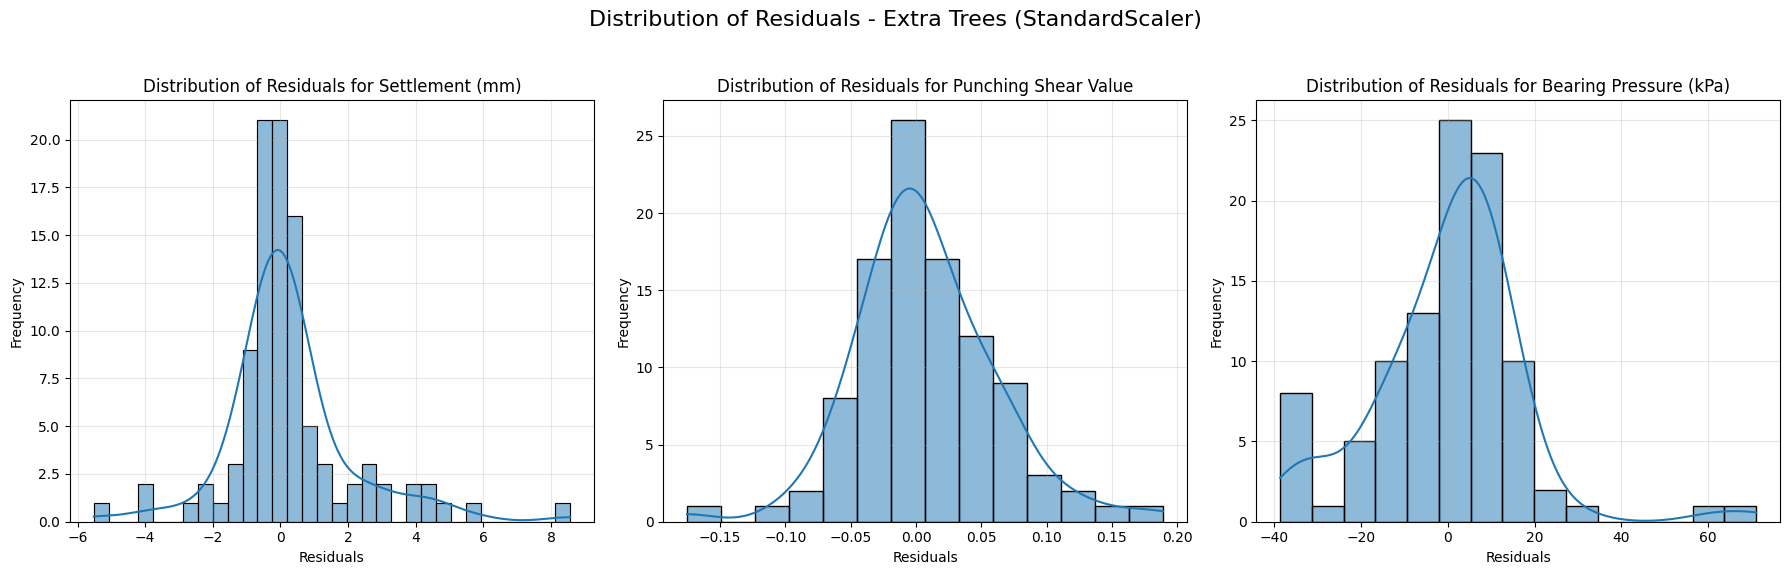


--- Prediction Analysis for CatBoost (StandardScaler) ---


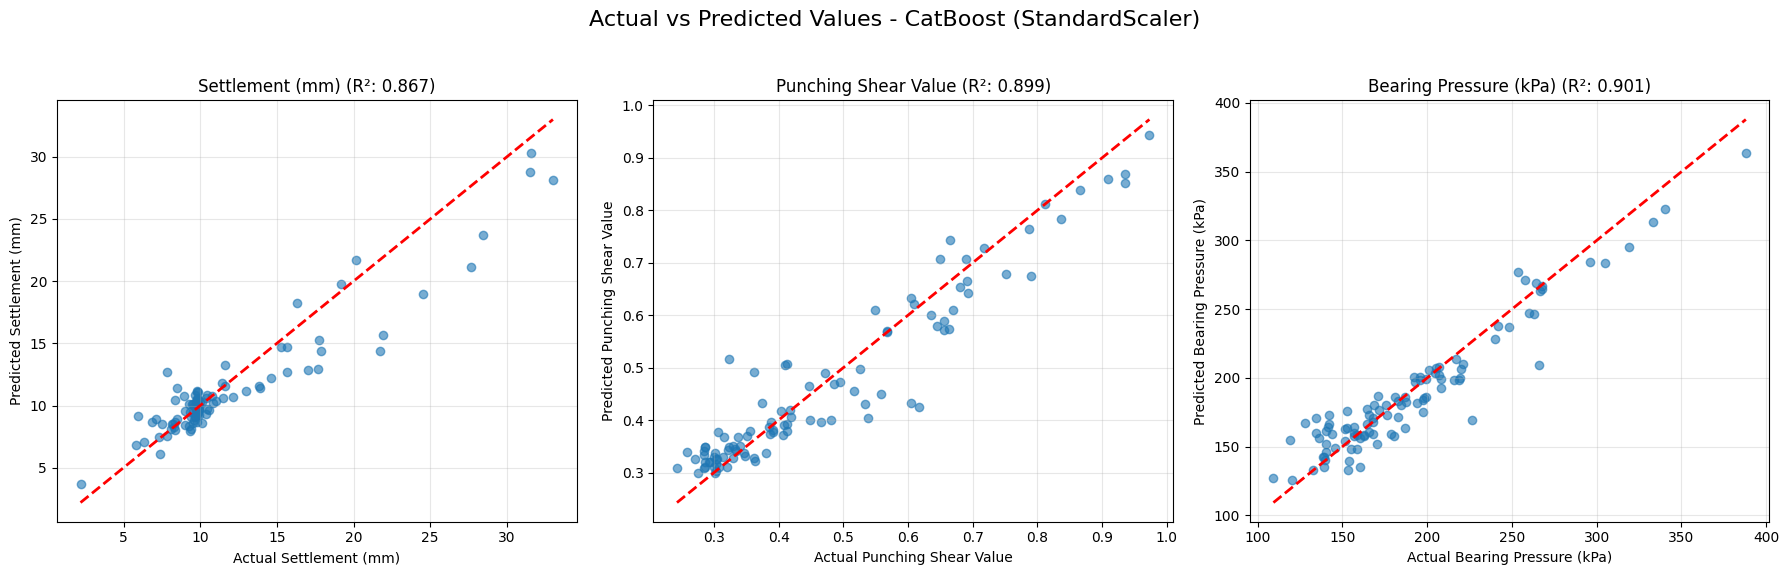

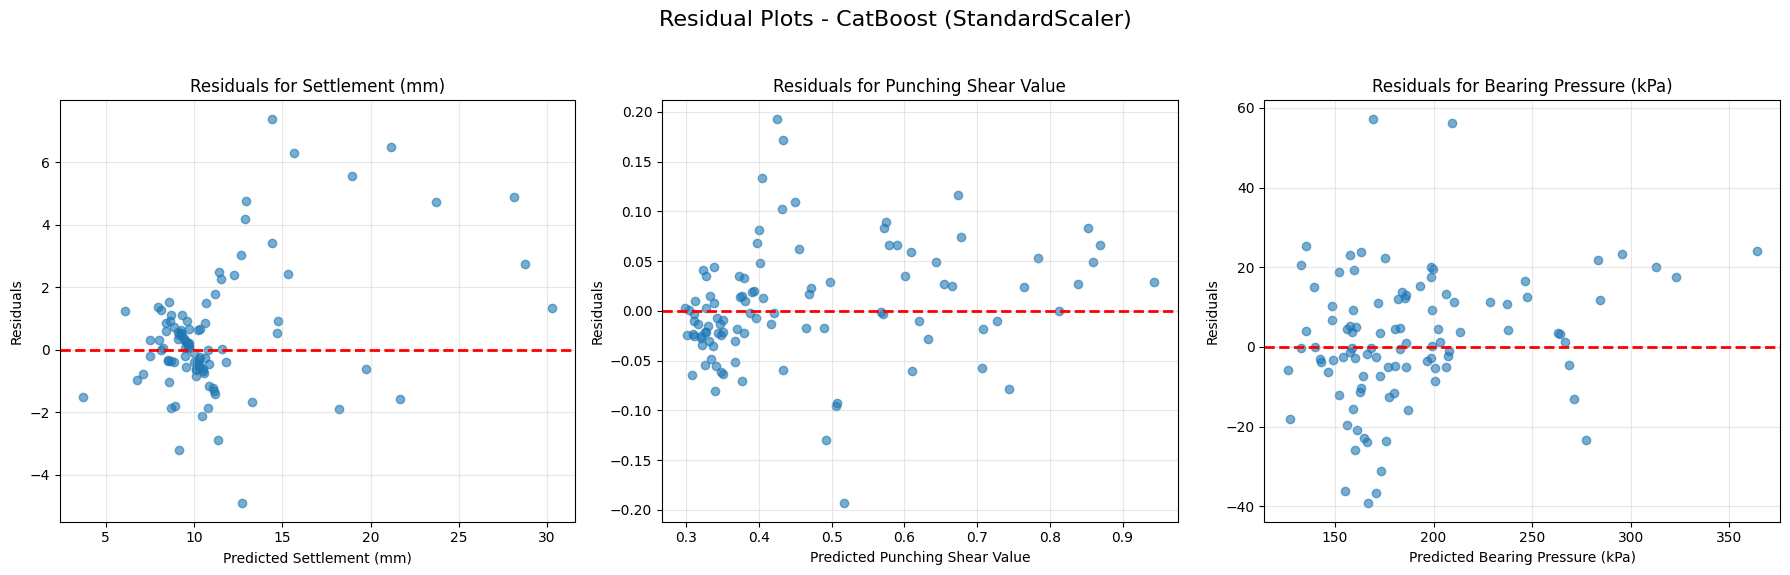

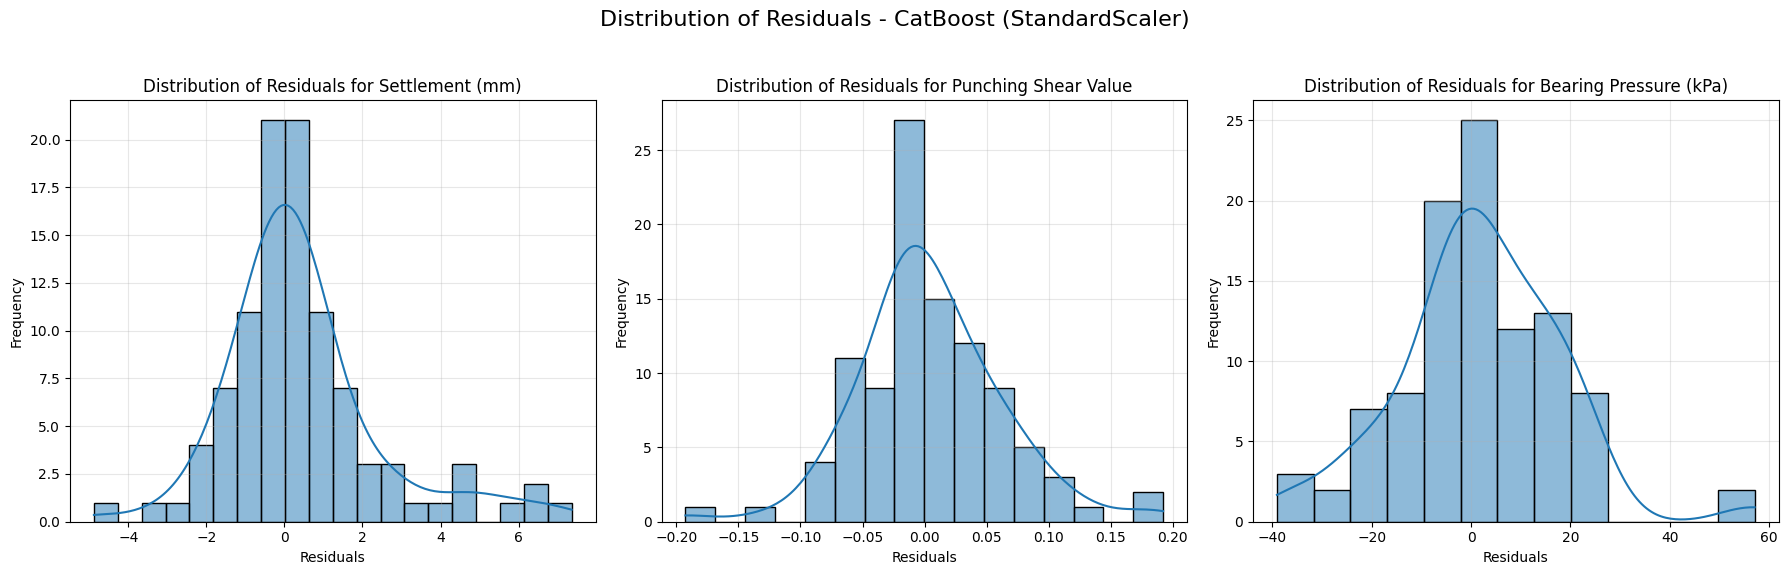


--- Prediction Analysis for Neural Network (StandardScaler) ---


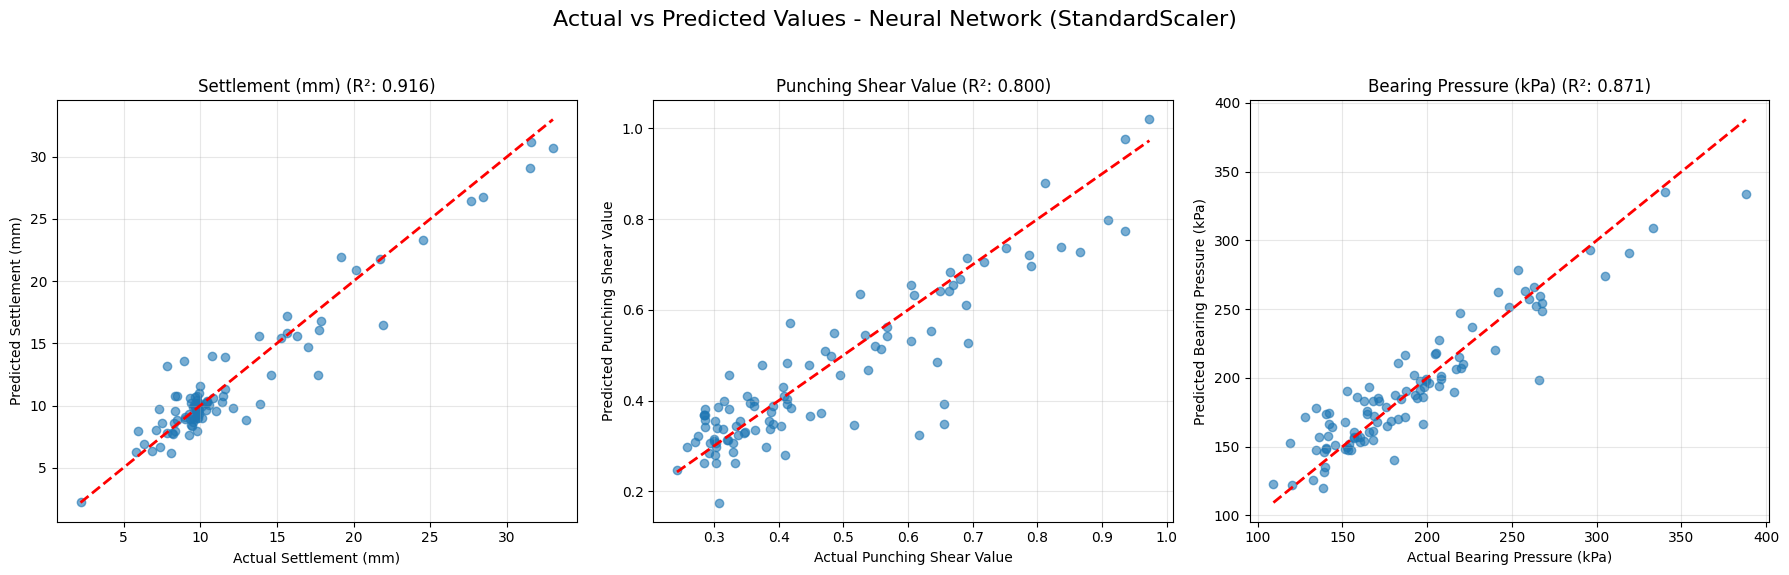

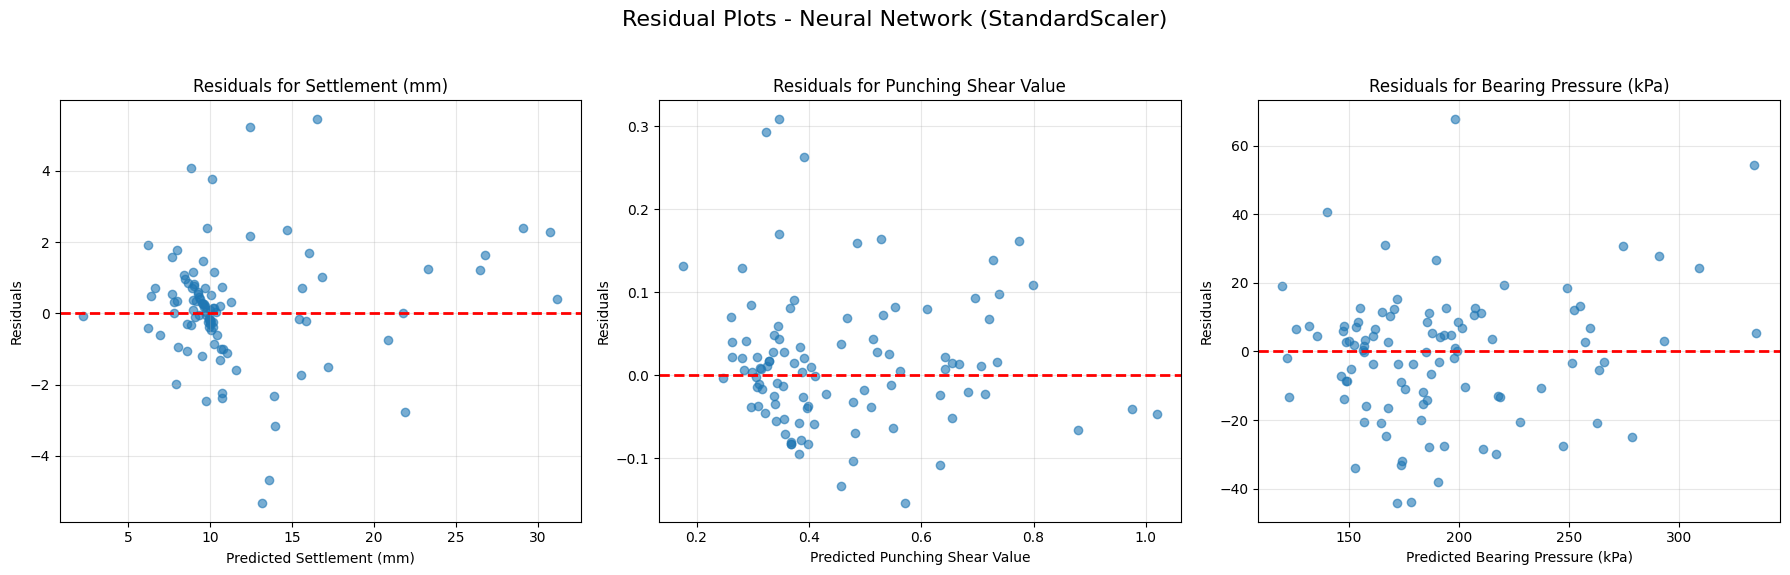

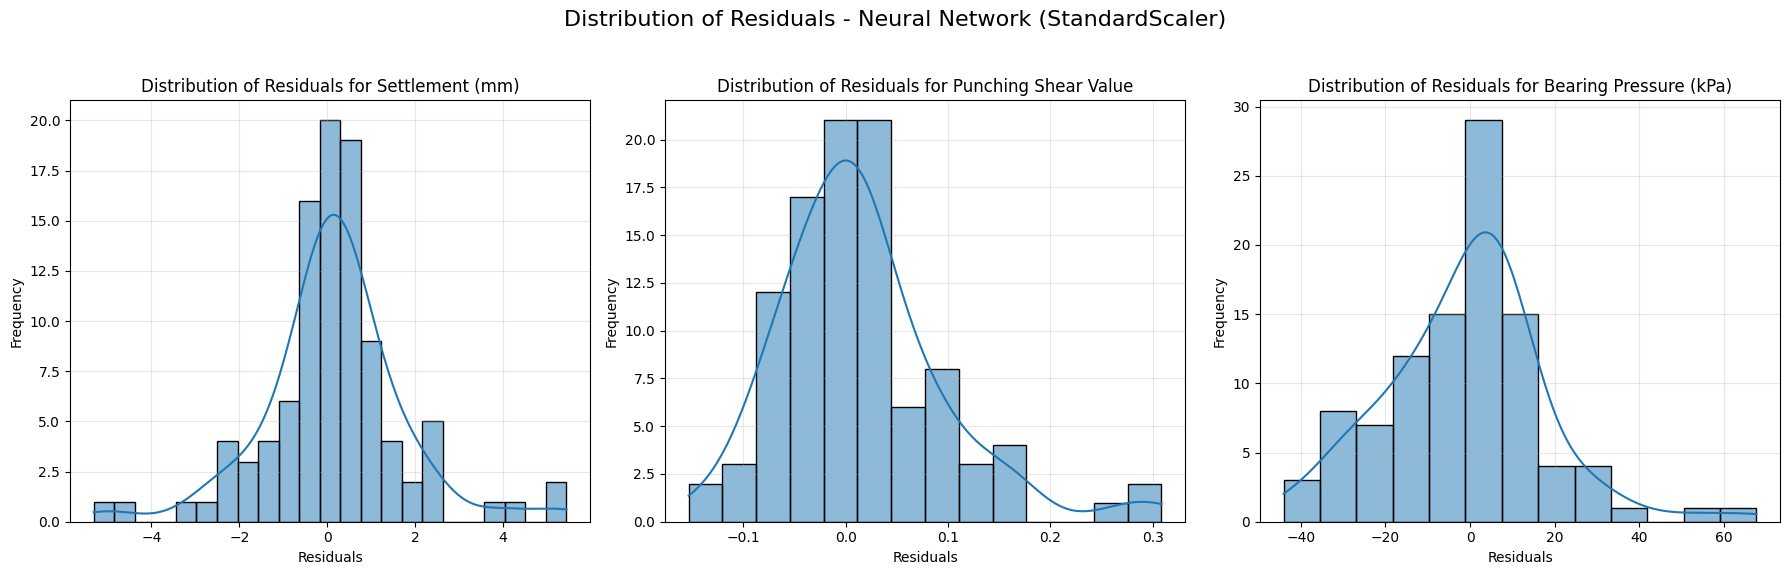

In [7]:
# Enhanced Machine Learning Model Evaluation for Raft Foundation Analysis
# This code evaluates multiple ML techniques comprehensively

# Step 0: Upload the Excel file and install dependencies
from google.colab import files
uploaded = files.upload()

!pip install openpyxl scikit-learn xgboost lightgbm catboost matplotlib seaborn

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression

# Step 2: Load Dataset
data = pd.read_excel('Expanded Analysis of Rafts (1).xlsx')
data.columns = data.columns.str.strip()  # Clean column names

# Step 3: Data Exploration and Preprocessing
print("=== Data Overview ===")
print(f"Dataset shape: {data.shape}")
print(f"Missing values:\n{data.isnull().sum()}")
print(f"\nData types:\n{data.dtypes}")

# Basic statistics
print("\n=== Statistical Summary ===")
print(data.describe())

# Check for outliers using IQR method
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    return outliers

# Define Features and Labels
X = data[['Number of  Columns', 'Area Of Raft (m^2)', 'Column Area (m^2)',
          "Compressive strength of Concrete Fc' (Mpa)", 'Concrete Unit Weight (kN/m^3)',
          'Subgrade Modulus kN/m/m^2', 'Maximum Axial Load on Column in kN',
          'Total Axial load on Column (kN)', 'Thickness of Raft (mm)']]

y = data[['Settlement (mm)', 'Punching Shear Value', 'Bearing Pressure (kPa)']]

# Check for outliers
outliers = detect_outliers(X, X.columns)
print(f"\nOutliers detected: {outliers}")

# Correlation analysis
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Step 4: Feature Engineering and Selection
# Create additional features
X['Load_per_Column'] = X['Total Axial load on Column (kN)'] / X['Number of  Columns']
X['Raft_Load_Ratio'] = X['Total Axial load on Column (kN)'] / X['Area Of Raft (m^2)']
X['Column_Density'] = X['Number of  Columns'] / X['Area Of Raft (m^2)']
X['Strength_to_Load_Ratio'] = X["Compressive strength of Concrete Fc' (Mpa)"] / X['Maximum Axial Load on Column in kN']

print(f"\nFeatures after engineering: {X.shape[1]}")

# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X, y.iloc[:, 0])  # Use first target for selection
selected_features = X.columns[selector.get_support()]
print(f"Selected features: {list(selected_features)}")

# Use selected features
X = X[selected_features]

# Step 5: Train-Test Split with different scaling methods
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)

# Different scaling methods
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Step 6: Comprehensive Model Definition
models = {
    # Linear Models
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=1.0, l1_ratio=0.5),

    # Tree-based Models
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, max_depth=6, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, verbose=-1),
    "CatBoost": CatBoostRegressor(iterations=100, depth=6, learning_rate=0.1, random_state=42, verbose=False),

    # Other Models
    "Support Vector Regression": SVR(kernel='rbf', C=1.0, gamma='scale'),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# Step 7: Model Evaluation with Cross-Validation
results = {}
best_models = {}

for scaler_name, scaler in scalers.items():
    print(f"\n{'='*50}")
    print(f"EVALUATING WITH {scaler_name}")
    print(f"{'='*50}")

    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    scaler_results = {}

    for model_name, base_model in models.items():
        try:
            print(f"\n--- {model_name} ---")

            # Use MultiOutputRegressor for multi-target prediction
            if hasattr(base_model, 'predict') and not hasattr(base_model, 'fit'):
                model = MultiOutputRegressor(base_model)
            else:
                model = MultiOutputRegressor(base_model)

            # Cross-validation
            cv_scores = []
            for target_idx in range(y.shape[1]):
                cv_score = cross_val_score(base_model, X_train_scaled, y_train.iloc[:, target_idx],
                                         cv=5, scoring='r2')
                cv_scores.append(cv_score.mean())

            # Fit model and predict
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            y_train_pred = model.predict(X_train_scaled) # Predict on training set


            # Calculate metrics for each target
            target_metrics = {}
            total_r2 = 0

            for i, target_col in enumerate(y.columns):
                r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
                mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
                rmse = np.sqrt(mse)
                mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
                train_r2 = r2_score(y_train.iloc[:, i], y_train_pred[:, i]) # Calculate training R2

                target_metrics[target_col] = {
                    'R²': r2,
                    'MSE': mse,
                    'RMSE': rmse,
                    'MAE': mae,
                    'CV_R²': cv_scores[i],
                    'Train_R²': train_r2  # Add training R2
                }

                total_r2 += r2

                print(f"\n{target_col}:")
                print(f"  R² Score (Test): {r2:.4f}") # Update print statement
                print(f"  R² Score (Train): {train_r2:.4f}") # Print training R2
                print(f"  CV R² Score: {cv_scores[i]:.4f}")
                print(f"  RMSE: {rmse:.4f}")
                print(f"  MAE: {mae:.4f}")

            # Store results
            avg_r2 = total_r2 / len(y.columns)
            scaler_results[model_name] = {
                'model': model,
                'avg_r2': avg_r2,
                'metrics': target_metrics,
                'predictions': y_pred
            }

        except Exception as e:
            print(f"Error with {model_name}: {str(e)}")
            continue

    results[scaler_name] = scaler_results

# Step 8: Find Best Model and Scaler Combination
best_combination = None
best_score = -np.inf

for scaler_name, scaler_results in results.items():
    for model_name, model_results in scaler_results.items():
        if model_results['avg_r2'] > best_score:
            best_score = model_results['avg_r2']
            best_combination = (scaler_name, model_name)

print(f"\n{'='*60}")
print(f"BEST MODEL COMBINATION")
print(f"{'='*60}")
print(f"Best Scaler: {best_combination[0]}")
print(f"Best Model: {best_combination[1]}")
print(f"Best Average R² Score: {best_score:.4f}")

# Step 9: Detailed Analysis of Best Model
best_scaler_name, best_model_name = best_combination
best_model_results = results[best_scaler_name][best_model_name]

print(f"\n--- Detailed Metrics for {best_model_name} with {best_scaler_name} ---")
for target, metrics in best_model_results['metrics'].items():
    print(f"\n{target}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

# Step 10: Feature Importance Analysis
best_model = best_model_results['model']
best_scaler = scalers[best_scaler_name]

# Re-fit with the best scaler
X_train_scaled = best_scaler.fit_transform(X_train)
X_test_scaled = best_scaler.transform(X_test)

# Feature importance for tree-based models
if best_model_name in ['Decision Tree', 'Random Forest', 'Extra Trees', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'CatBoost']:
    try:
        # Get feature importance from first estimator
        if hasattr(best_model.estimators_[0], 'feature_importances_'):
            importances = best_model.estimators_[0].feature_importances_
        else:
            importances = best_model.feature_importances_

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        sorted_idx = np.argsort(importances)[::-1]
        plt.bar(range(len(importances)), importances[sorted_idx])
        plt.xticks(range(len(importances)), [X.columns[i] for i in sorted_idx], rotation=45)
        plt.title(f'Feature Importance - {best_model_name}')
        plt.tight_layout()
        plt.show()

        print(f"\nFeature Importance Rankings:")
        for i, idx in enumerate(sorted_idx):
            print(f"{i+1}. {X.columns[idx]}: {importances[idx]:.4f}")

    except Exception as e:
        print(f"Could not extract feature importance: {e}")

# Permutation importance (works for all models)
try:
    perm_importance = permutation_importance(best_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

    plt.figure(figsize=(10, 6))
    sorted_idx = perm_importance.importances_mean.argsort()[::-1]
    plt.bar(range(len(perm_importance.importances_mean)), perm_importance.importances_mean[sorted_idx])
    plt.xticks(range(len(perm_importance.importances_mean)), [X.columns[i] for i in sorted_idx], rotation=45)
    plt.title(f'Permutation Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Could not calculate permutation importance: {e}")

# Step 11: Visualization of Best Model Performance
predictions = best_model_results['predictions']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, target_col in enumerate(y.columns):
    axes[i].scatter(y_test.iloc[:, i], predictions[:, i], alpha=0.6)
    axes[i].plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
                 [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'r--', lw=2)
    axes[i].set_xlabel(f'Actual {target_col}')
    axes[i].set_ylabel(f'Predicted {target_col}')
    axes[i].set_title(f'{target_col}: R² = {best_model_results["metrics"][target_col]["R²"]:.3f}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 12: Model Comparison Summary
print(f"\n{'='*80}")
print("MODEL COMPARISON SUMMARY")
print(f"{'='*80}")

# Create comparison dataframe
comparison_data = []
for scaler_name, scaler_results in results.items():
    for model_name, model_results in scaler_results.items():
        # Filter out models with negative R² scores and average R² less than 0.5
        if model_results['avg_r2'] >= 0.5:
            comparison_data.append({
                'Scaler': scaler_name,
                'Model': model_name,
                'Avg_R²': model_results['avg_r2'],
                'Settlement_R²_Test': model_results['metrics']['Settlement (mm)']['R²'], # Update column names
                'Settlement_R²_Train': model_results['metrics']['Settlement (mm)']['Train_R²'], # Add train R2
                'Punching_R²_Test': model_results['metrics']['Punching Shear Value']['R²'], # Update column names
                'Punching_R²_Train': model_results['metrics']['Punching Shear Value']['Train_R²'], # Add train R2
                'Bearing_R²_Test': model_results['metrics']['Bearing Pressure (kPa)']['R²'], # Update column names
                'Bearing_R²_Train': model_results['metrics']['Bearing Pressure (kPa)']['Train_R²']  # Add train R2
            })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Avg_R²', ascending=False)

print(comparison_df.to_string(index=False))

# Step 13: Hyperparameter Tuning for Best Model
print(f"\n{'='*60}")
print("HYPERPARAMETER TUNING FOR BEST MODEL")
print(f"{'='*60}")

if best_model_name == 'Random Forest':
    param_grid = {
        'estimator__n_estimators': [50, 100, 200],
        'estimator__max_depth': [5, 10, 15, None],
        'estimator__min_samples_split': [2, 5, 10]
    }
elif best_model_name == 'XGBoost':
    param_grid = {
        'estimator__n_estimators': [50, 100, 200],
        'estimator__max_depth': [3, 6, 9],
        'estimator__learning_rate': [0.01, 0.1, 0.2]
    }
elif best_model_name == 'SVR':
    param_grid = {
        'estimator__C': [0.1, 1, 10],
        'estimator__gamma': ['scale', 'auto', 0.1, 1]
    }
else:
    param_grid = {}

if param_grid:
    print(f"Tuning hyperparameters for {best_model_name}...")

    # Create base model
    base_model = models[best_model_name]
    tuned_model = MultiOutputRegressor(base_model)

    # Grid search
    grid_search = GridSearchCV(tuned_model, param_grid, cv=3, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

    # Evaluate tuned model
    tuned_predictions = grid_search.predict(X_test_scaled)
    tuned_r2_scores = []

    for i, target_col in enumerate(y.columns):
        tuned_r2 = r2_score(y_test.iloc[:, i], tuned_predictions[:, i])
        tuned_r2_scores.append(tuned_r2)
        print(f"Tuned {target_col} R²: {tuned_r2:.4f}")

    print(f"Average tuned R²: {np.mean(tuned_r2_scores):.4f}")

# Step 14: Custom Prediction Function
def make_prediction(model, scaler, feature_names):
    """Function to make predictions with user input"""
    print("\n--- Custom Prediction ---")
    user_input = []

    for col in feature_names:
        while True:
            try:
                val = float(input(f"Enter value for '{col}': "))
                user_input.append(val)
                break
            except ValueError:
                print("Please enter a valid number.")

    # Scale input
    user_input_scaled = scaler.transform([user_input])

    # Make prediction
    prediction = model.predict(user_input_scaled)

    print(f"\nPrediction Results:")
    for i, col in enumerate(y.columns):
        print(f"{col}: {prediction[0][i]:.4f}")

    return prediction

# Step 15: Save Best Model (optional)
import pickle

# Save the best model and scaler
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('best_scaler.pkl', 'wb') as f:
    pickle.dump(best_scaler, f)

print(f"\nBest model and scaler saved successfully!")
print(f"Model: {best_model_name} with {best_scaler_name}")
print(f"Final Average R² Score: {best_score:.4f}")

# Uncomment the line below to make custom predictions
# make_prediction(best_model, best_scaler, X.columns)

# Step 16: Visualize Model Accuracies and Predictions

print(f"\n{'='*80}")
print("MODEL ACCURACY AND PREDICTION VISUALIZATIONS (StandardScaler)")
print(f"{'='*80}")

# Filter results for StandardScaler only
standard_scaler_results = results.get('StandardScaler', {})

# Prepare data for accuracy plotting, filtering out models with negative R² and average R² less than 0.5
accuracy_plot_data = []
for model_name, model_results in standard_scaler_results.items():
    if model_results['avg_r2'] >= 0.5:
        for target_col, metrics in model_results['metrics'].items():
            accuracy_plot_data.append({
                'Model': model_name,
                'Target': target_col,
                'Metric': 'R² (Test)',
                'Score': metrics['R²']
            })
            accuracy_plot_data.append({
                'Model': model_name,
                'Target': target_col,
                'Metric': 'R² (Train)',
                'Score': metrics['Train_R²']
            })
            accuracy_plot_data.append({
                'Model': model_name,
                'Target': target_col,
                'Metric': 'CV R²',
                'Score': metrics['CV_R²']
            })

accuracy_plot_df = pd.DataFrame(accuracy_plot_data)

# Create plots for R² metrics for each target variable (StandardScaler)
for target_col in y.columns:
    plt.figure(figsize=(15, 8))
    target_df = accuracy_plot_df[accuracy_plot_df['Target'] == target_col]

    sns.barplot(x='Model', y='Score', hue='Metric', data=target_df, palette='viridis')

    plt.title(f'Model R² Performance Comparison for {target_col} (StandardScaler)')
    plt.ylabel('R² Score')
    plt.xticks(rotation=45, ha='right')
    plt.ylim([-0.1, 1])  # Adjusted y-limit for R-squared
    plt.tight_layout()
    plt.show()

# Plot average R² across all targets (StandardScaler)
plt.figure(figsize=(15, 8))
avg_r2_data = []
for model_name, model_results in standard_scaler_results.items():
    # Filter out models with average R² less than 0.5
    if model_results['avg_r2'] >= 0.5:
         avg_r2_data.append({
            'Model': model_name,
            'Avg_R²': model_results['avg_r2']
        })

avg_r2_df = pd.DataFrame(avg_r2_data)
avg_r2_df = avg_r2_df.sort_values('Avg_R²', ascending=False)

sns.barplot(x='Model', y='Avg_R²', data=avg_r2_df, palette='viridis')
plt.title('Average R² Score Across All Targets (StandardScaler)')
plt.ylabel('Average R² Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Additional Analysis Graphs using StandardScaler predictions

print(f"\n{'='*80}")
print("PREDICTION ANALYSIS VISUALIZATIONS (StandardScaler)")
print(f"{'='*80}")

# Select a few top performing models for detailed prediction analysis (from the filtered list)
top_models_for_analysis = avg_r2_df['Model'].head(3).tolist() # Get top 3 models from the filtered list

for model_name in top_models_for_analysis:
    # Check if the model_name exists in the standard_scaler_results before accessing its predictions
    if model_name in standard_scaler_results:
        model_results = standard_scaler_results[model_name]
        predictions = model_results['predictions']

        print(f"\n--- Prediction Analysis for {model_name} (StandardScaler) ---")

        # Scatter plot of Actual vs Predicted for each target
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        fig.suptitle(f'Actual vs Predicted Values - {model_name} (StandardScaler)', fontsize=16)

        for i, target_col in enumerate(y.columns):
            axes[i].scatter(y_test.iloc[:, i], predictions[:, i], alpha=0.6)
            axes[i].plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
                         [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'r--', lw=2)
            axes[i].set_xlabel(f'Actual {target_col}')
            axes[i].set_ylabel(f'Predicted {target_col}')
            axes[i].set_title(f'{target_col} (R²: {model_results["metrics"][target_col]["R²"]:.3f})')
            axes[i].grid(True, alpha=0.3)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
        plt.show()

        # Residual plots for each target
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        fig.suptitle(f'Residual Plots - {model_name} (StandardScaler)', fontsize=16)

        for i, target_col in enumerate(y.columns):
            residuals = y_test.iloc[:, i] - predictions[:, i]
            axes[i].scatter(predictions[:, i], residuals, alpha=0.6)
            axes[i].axhline(y=0, color='r', linestyle='--', lw=2)
            axes[i].set_xlabel(f'Predicted {target_col}')
            axes[i].set_ylabel('Residuals')
            axes[i].set_title(f'Residuals for {target_col}')
            axes[i].grid(True, alpha=0.3)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

        # Distribution of Residuals for each target
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        fig.suptitle(f'Distribution of Residuals - {model_name} (StandardScaler)', fontsize=16)

        for i, target_col in enumerate(y.columns):
            residuals = y_test.iloc[:, i] - predictions[:, i]
            sns.histplot(residuals, kde=True, ax=axes[i])
            axes[i].set_xlabel('Residuals')
            axes[i].set_ylabel('Frequency')
            axes[i].set_title(f'Distribution of Residuals for {target_col}')
            axes[i].grid(True, alpha=0.3)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()